### Heart Disease Detection Project

#### Background: I have always been fascinated by how much machine learning can add values to the real world, especially in the healthcare industry. A good prediction model can save lives, which is extremely valuable. In this project I aim to build a classification model to predict whether a patient has heart disease or not. Without any medical background, I certainly do not have much knowledge about healthcare. However, I would like to see how machine learning can improve heart disease detection rate. 

In [368]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings("ignore")

In [369]:
# helper function 

def load_data(file):
    return pd.read_csv(file)
    
def plot_num_feature(df,col):
    
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Distribution of {}'.format(col))
    # countplot if dummy variables
    if df[col].max()==1:
        sns.countplot(df[col])
    # Distribution plot if not dummy
    else:
        sns.distplot(df[col],hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
    
    
    plt.subplot(1,2,2)
    mean = df.groupby(col)['target'].mean()
    std = df.groupby(col)['target'].std()
    mean.plot()
    plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    plt.title('Association between Target and {}'.format(col))
    plt.ylabel('Target')
    plt.show()    
    

## Explore the Data

In [370]:
# Loading data
df = load_data('heart.csv')

##### Data contains 

##### age - age in years 
##### sex - (1 = male; 0 = female) 
##### cp - chest pain type 
##### trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
##### chol - serum cholestoral in mg/dl 
##### fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
##### restecg - resting electrocardiographic results 
##### thalach - maximum heart rate achieved 
##### exang - exercise induced angina (1 = yes; 0 = no) 
##### oldpeak - ST depression induced by exercise relative to rest 
##### slope - the slope of the peak exercise ST segment 
##### ca - number of major vessels (0-3) colored by flourosopy 
##### thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
##### target - have disease or not (1=yes, 0=no)

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [372]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [373]:
print('There is {} observation and {} features'.format(df.shape[0],df.shape[1]-1))

There is 303 observation and 13 features


In [374]:
# Rename columns 
col_name = {'cp':"chest_pain_type",'trestbps':"rest_bp",'fbs':"bloodsugar",'restecg':"rest_ecg",'thalach':"max_heartrate",'exang':"exercise_angina",'oldpeak':"depression",'ca':"n_major_vasel"}

df.rename(columns = col_name,inplace=True)

# Get target and feature columns
target_col = df['target']
feature_col = list(df.columns[0:13])


In [375]:
# Check missing data
df.isnull().sum().any()

False

In [376]:
df.head()

,age,sex,chest_pain_type,rest_bp,chol,bloodsugar,rest_ecg,max_heartrate,exercise_angina,depression,slope,n_major_vasel,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<IPython.core.display.Javascript object>


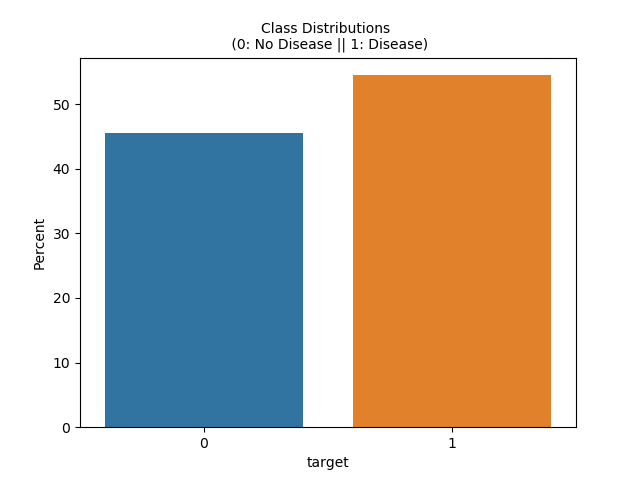

Text(0, 0.5, 'Percent')

In [377]:
# Check distribution of the target variable 
plt.figure()
sns.barplot(y= target_col,x= target_col,estimator=lambda target: len(target) / len(df) * 100)
plt.title('Class Distributions \n (0: No Disease || 1: Disease)', fontsize=10)
plt.ylabel('Percent')

#### The dataset is quite balanced, so we should be good to use accuracy as a evaluation metric. There are some other options such as AUC score- the area under the ROC curve, or the lift curve,etc. 

<IPython.core.display.Javascript object>


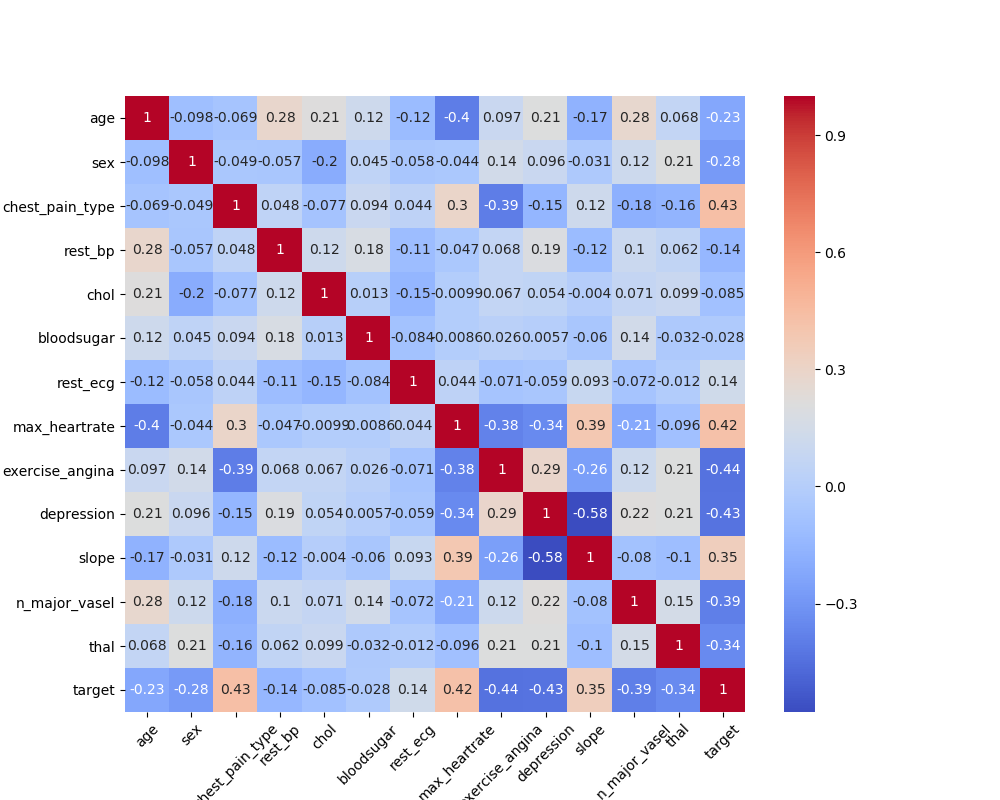

In [378]:
#look for correlation between each feature and the target
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df[feature_col + ['target']].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

##### From the above correlation matrix, chest_pain, max_heartrate, slope are more positively correlated with the heart disease, exercise_angina,depression,n_major_vasel, thal are more negative correlated with the heart disease.

##### Potential collinearity are slope/depression, exercise_angina/chest_pain_type, max_heartrate/slope 

#### However, correlation is only good at capturing linear relationship. There could be some non-linear relationship between variables that are not captured in the matrix. We will need to further dive into the dataset and look for patterns between different variables.

<IPython.core.display.Javascript object>


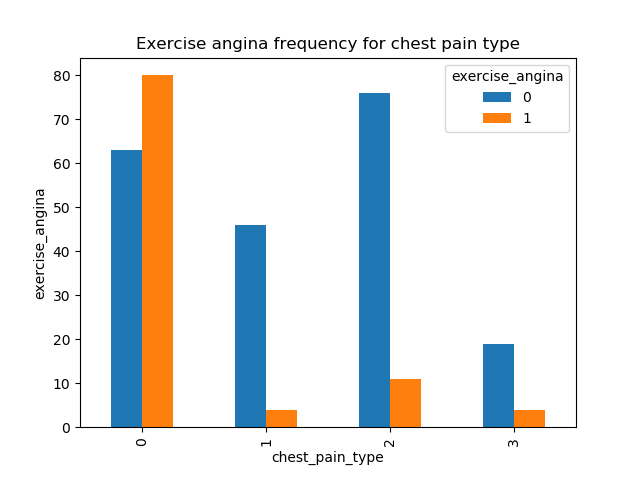

Text(0, 0.5, 'exercise_angina')

In [379]:
pd.crosstab(df.chest_pain_type,df.exercise_angina).plot(kind='bar')
plt.title('Exercise angina frequency for chest pain type')
plt.ylabel('exercise_angina')

#### Interesting that people who have no chest pain tend to have angina, need to investigate further

<IPython.core.display.Javascript object>


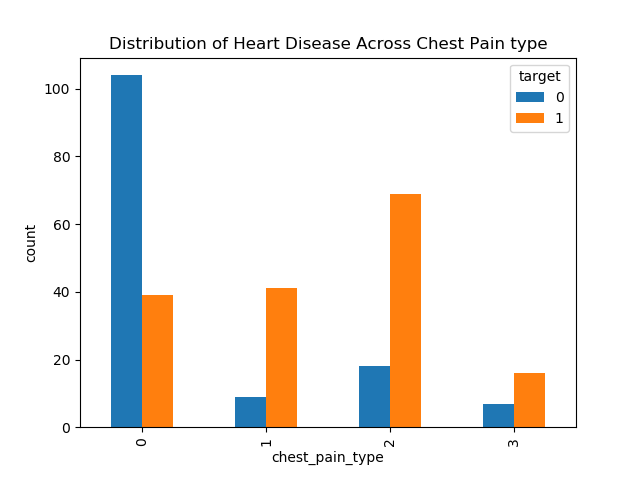

Text(0, 0.5, 'count')

In [380]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind='bar')
plt.title('Distribution of Heart Disease Across Chest Pain type')
plt.ylabel('count')

##### Now I am going to transform the categorical variables - chest pain type, slope and thal into dummy variables so that the algorithms can process them correctly.

In [381]:
## Transform into categorical variables 
df['chest_pain_type'] = df['chest_pain_type'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

In [382]:
df = pd.get_dummies(df,drop_first=True)

In [383]:
num_feature = ['age','rest_bp','chol','max_heartrate','depression','bloodsugar','rest_ecg','exercise_angina']
cat_feature = ['chest_pain_type_1','chest_pain_type_2','chest_pain_type_3','slope_1','slope_2','thal_1','thal_2','thal_3']
df.head()

,age,sex,rest_bp,chol,bloodsugar,rest_ecg,max_heartrate,exercise_angina,depression,n_major_vasel,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,1,0


<IPython.core.display.Javascript object>


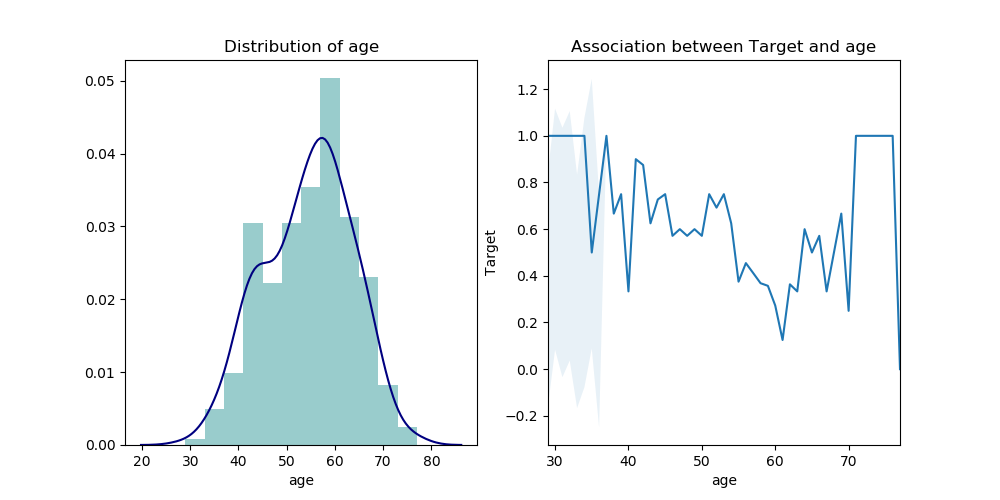

<IPython.core.display.Javascript object>


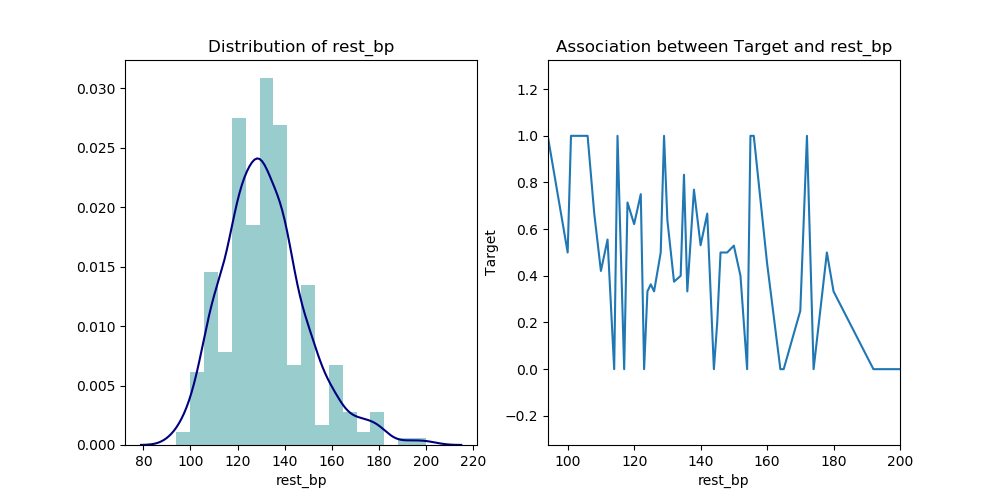

<IPython.core.display.Javascript object>


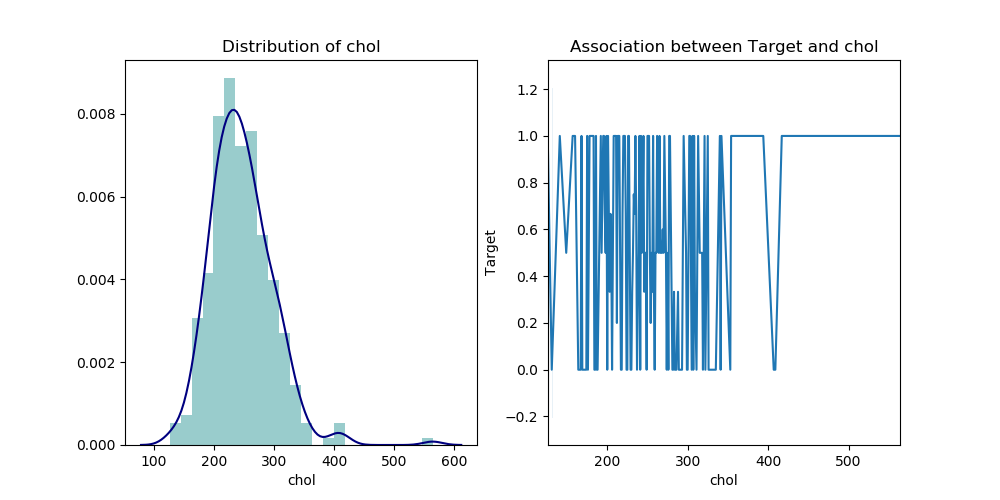

<IPython.core.display.Javascript object>


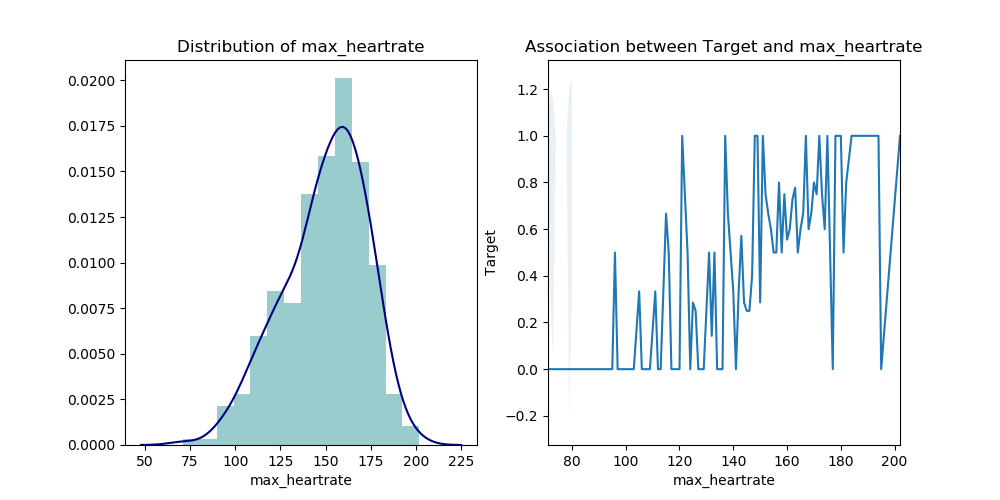

<IPython.core.display.Javascript object>


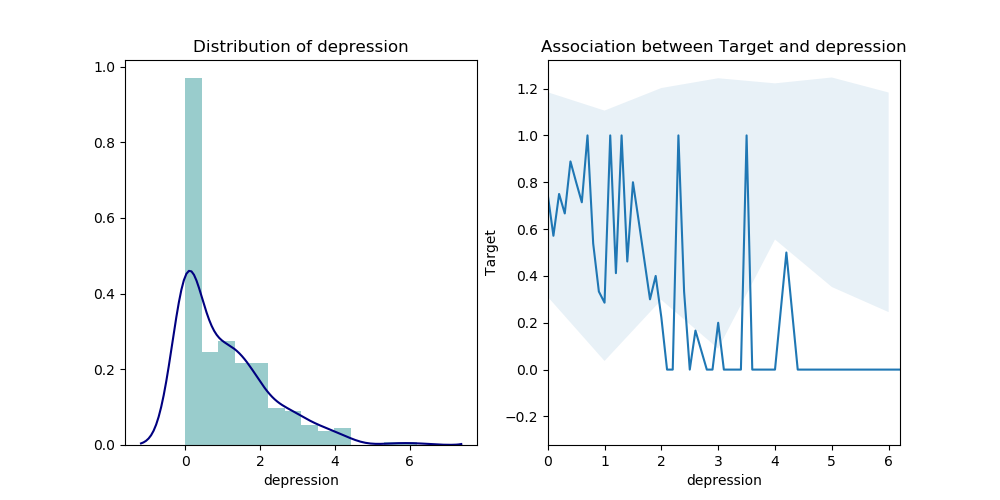

<IPython.core.display.Javascript object>


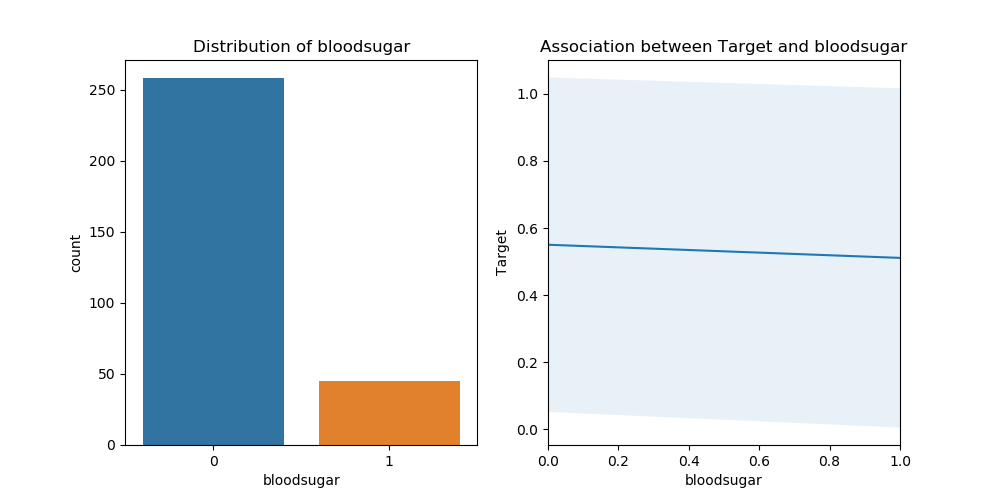

<IPython.core.display.Javascript object>


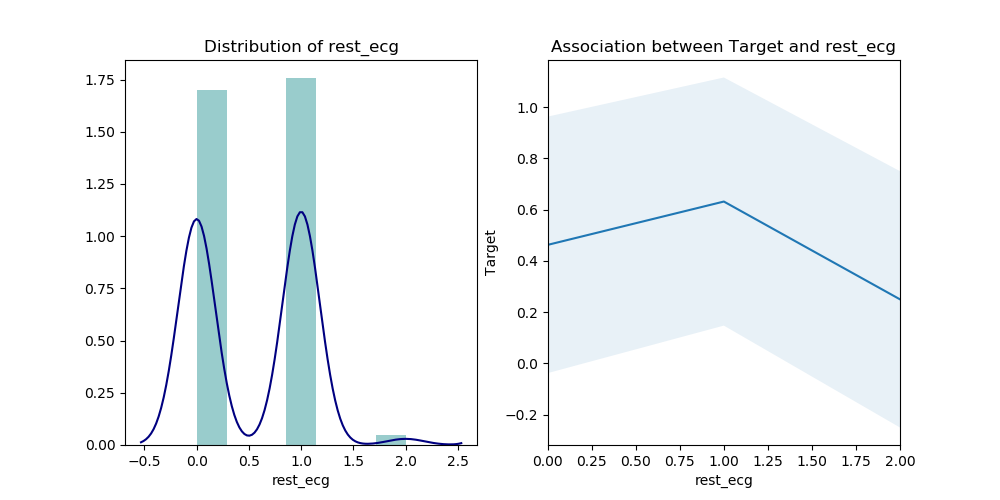

<IPython.core.display.Javascript object>


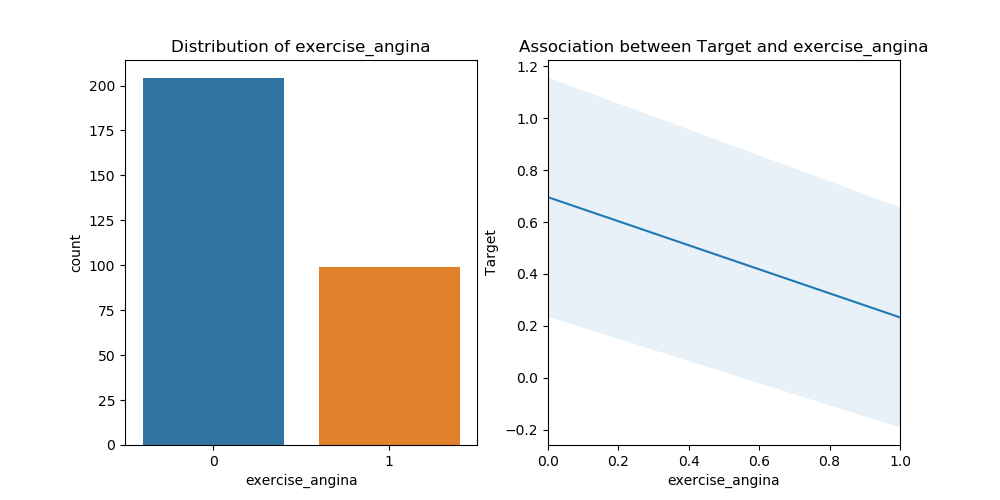

In [384]:
### plotting numeric features
for num in num_feature:
    plot_num_feature(df,num)

## Building Models

In [ ]:
## Split the dataset for training and testing
# Create array to store our features and target variable
X = df.drop('target',axis=1).values
y = df['target'].values
## Scale the data so that variables are on the same scale
X_scaled = preproc.StandardScaler().fit_transform(X) # Make variables on the same scale
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42, stratify=y)


### Random Forest Baseline Model

In [319]:
# Build model
rf= RandomForestClassifier(oob_score=True, random_state=40)
# fitting model
rf = rf.fit(X_train, y_train)

In [320]:
# Check the auc score
from sklearn.metrics import roc_auc_score
pred_train = np.argmax(rf.oob_decision_function_,axis=1)
rf_numeric_auc = roc_auc_score(y_train, pred_train)
rf_numeric_auc

0.7287878787878789

In [321]:
# predict on X_test
rf_predict = rf.predict(X_test)
test_accuracy_rf = rf.score(X_test, y_test) 
print('Test accuracy is {:.2f}%'.format(test_accuracy_rf*100))

Test accuracy is 73.77%


In [350]:
importances = rf.feature_importances_

In [351]:
df_importance = pd.Series(importances,index= df.drop('target',axis=1).columns)
print(df_importance)

age                  0.070453
sex                  0.018649
rest_bp              0.055606
chol                 0.093712
bloodsugar           0.007409
rest_ecg             0.019048
max_heartrate        0.095522
exercise_angina      0.079204
depression           0.088984
n_major_vasel        0.064785
chest_pain_type_1    0.010468
chest_pain_type_2    0.047366
chest_pain_type_3    0.004818
slope_1              0.038445
slope_2              0.072834
thal_1               0.002338
thal_2               0.156213
thal_3               0.074147
dtype: float64


<IPython.core.display.Javascript object>


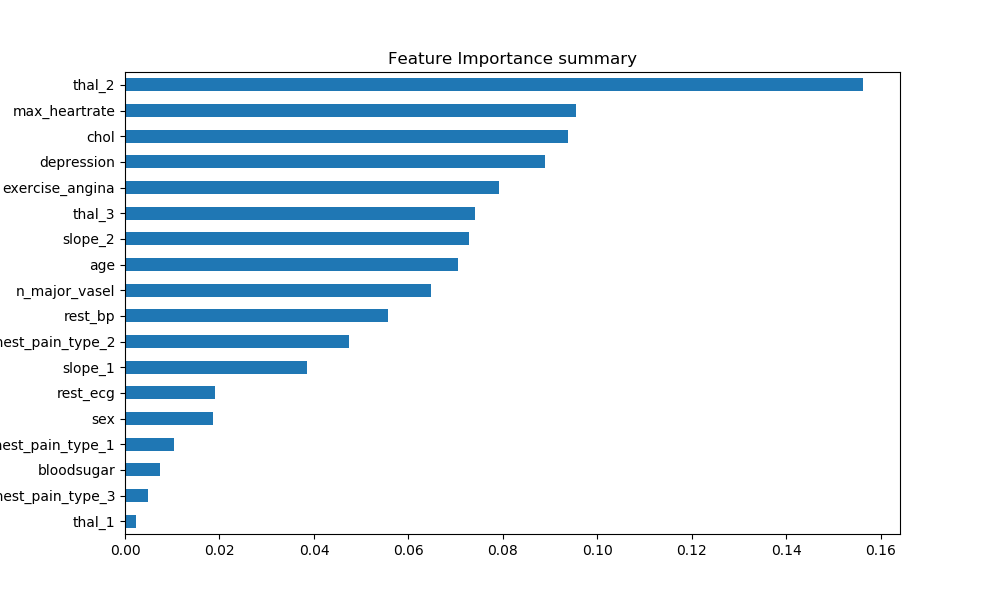

Text(0.5, 1.0, 'Feature Importance summary')

In [367]:
feature_plot = plt.figure()
feature_plot = df_importance.sort_values().plot(kind='barh',figsize=(10,6))
plt.title('Feature Importance summary')

#### Now let see if we can build some other models that can beat the random forest baseline on accuracy

### Logistic Regression

In [356]:
logistic_model = LogisticRegression(C=0.01, class_weight='balanced')
logistic_model = logistic_model.fit(X_train, y_train)

In [357]:
log_predicted = logistic_model.predict(X_test)
log_predicted[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [358]:
# Evaluate test performance
test_accuracy = logistic_model.score(X_test, y_test) 
print('Test accuracy is {:.2f}%'.format(test_accuracy*100))

Test accuracy is 83.61%


In [359]:
# Print Confusion Matrix
print (metrics.confusion_matrix(y_test, log_predicted))

[[23  5]
 [ 5 28]]


In [360]:
print (metrics.classification_report(y_test, log_predicted))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

   micro avg       0.84      0.84      0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### KNN Classifier

In [361]:
# Create K values (1-10) & Create Arrays to store train/test performance accuracy
k = np.arange(1,50)
train_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))

for i,k in enumerate(k):
    # Instantiate NN Classifier with K Neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(X_train, y_train)
    
    # Evaluate train performance 
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Evaluate test performance
    test_accuracy[i] = knn.score(X_test, y_test) 

<IPython.core.display.Javascript object>


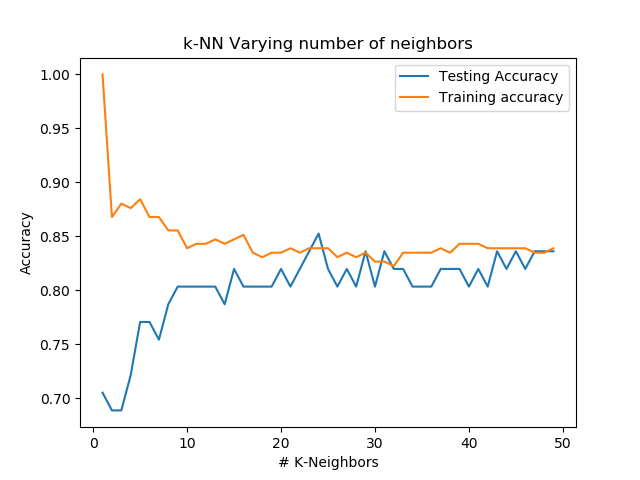

In [366]:
# Visualize Train/Test Performance
k = np.arange(1,50)
plt.figure()
plt.title('k-NN Varying number of neighbors')
knn_plot = plt.plot(k, test_accuracy, label='Testing Accuracy')
knn_plot = plt.plot(k, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('# K-Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [299]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [300]:
knn_predicted = knn_cv.predict(X_test)

In [301]:
print('{} has the best k and the best score is {:.2f}%'.format(knn_cv.best_params_,knn_cv.best_score_*100))

{'n_neighbors': 9} has the best k and the best score is 84.30%


In [302]:
print (metrics.confusion_matrix(y_test, knn_predicted))

[[21  7]
 [ 5 28]]


### Support Vector Machine

In [248]:
# Tuning regularizatioin parameter
rp = [0.1,0.2,0.5,1,1.5,2]
train_accuracy_sv = np.empty(len(rp))
test_accuracy_sv = np.empty(len(rp))
for i,k in enumerate(rp):
    sv = SVC(kernel='rbf', C=k)
    sv.fit(X_train,y_train)
    train_accuracy_sv[i] = sv.score(X_train, y_train)
    test_accuracy_sv[i] = sv.score(X_test, y_test)
    

<IPython.core.display.Javascript object>


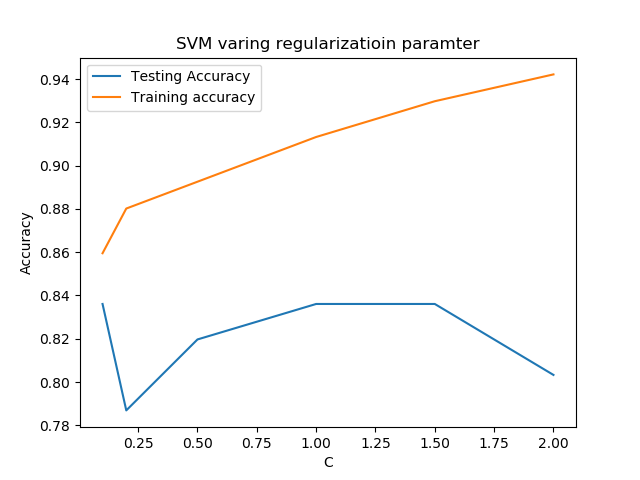

In [365]:
# Visualize train/test performance
rp = [0.1,0.2,0.5,1,1.5,2]
plt.figure()
plt.title('SVM varing regularizatioin paramter')
plt.plot(rp, test_accuracy_sv, label='Testing Accuracy')
plt.plot(rp, train_accuracy_sv, label='Training accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

In [253]:
## Building model
sv = SVC(C=1,kernel='rbf', random_state = 40)
sv.fit(X_train, y_train) 
sv_predicted = sv.predict(X_test)
sv_score = sv.score(X_test,y_test)

In [254]:
print('The test accuracy is {:.2f}%'.format(sv_score*100))

The test accuracy is 83.61%


In [255]:
print (metrics.confusion_matrix(y_test, sv_predicted))

[[20  8]
 [ 2 31]]


#### Since the cost of misclassifying patients when they in fact have heart disease is significantly higher than when they don't have heart disease, we want to minimize the false negative in this case. 

#### We can see that all models have similar accuracy, but the number of false negative varies. We want to minimize the false negatives while maximize the true positive, so recall (TP/ TP +FN) or precision (TP/TP+FP) might be a better metric. F1 and AUC curve are some other alternative options.

### 5-fold Cross Validation

In [256]:
models = []
cv_score = {}
cv_std = {}

#define number of processes to run in parallel
num_procs = 2

In [257]:
sv_tuned = SVC(C=1,kernel='rbf', random_state = 40)
knn_tuned = KNeighborsClassifier(n_neighbors=9)
logistic_model_tuned = LogisticRegression(C=1,class_weight='balanced')

models.extend([sv_tuned,knn_tuned,logistic_model_tuned])

print("Beginning cross validation")
for model in models:
    mean_score = cross_val_score(model, X_train, y_train, cv=5)

    print(model)
    print('The cross validation score is {:.2f}%'.format(mean_score.mean()*100))

Beginning cross validation
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=40,
  shrinking=True, tol=0.001, verbose=False)
The cross validation score is 82.26%
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')
The cross validation score is 84.31%
LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
The cross validation score is 85.14%


#### Logistic Regression model has the best cross validation score - 85.14% 

### Future improvement
1. Feature engineering - Further understanding of variables, potentially combine some columns or adding new features.
2. Accuracy is not the best metric to evaluate the model performance even with the balanced dataset. Will try F1 or AUC curve. 
3. Further tuning on random forest, adding gradient boosting to compare results
